In [2]:
from overfit.utils.misc import sharpen
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import torch

In [3]:
matplotlib.rc("text", usetex=True)
matplotlib.rc("font", **{"family": "serif", "serif": ["Computer Modern Roman, Times"]})

In [6]:
def plot_sharpen_example(confidences=[0.3, 0.6, 0.995]):
    n = 10
    # x = np.linspace(0, 1.5 * np.pi, n)
    x = np.array(range(0, n))
    sin_x = np.sin(np.pi * x/ n) + np.random.uniform(0, 0.01, n)
    sin_x = torch.Tensor(sin_x).type(torch.float64)

    fig, axes = plt.subplots(1, 2)
    sin_x_norm = torch.nn.functional.softmax(sin_x, dim=0)
    for ix, conf in enumerate(confidences):
        sin_x_sharpen_low = sharpen(sin_x_norm, T=1 - conf, dim=0)
        axes[ix].set_ylim(0, 0.5)
        axes[ix].bar(x, sin_x_norm, label="Base $(\\alpha=0)$", facecolor='#e63946a0', edgecolor="#e63946")
        axes[ix].bar(x, sin_x_sharpen_low, label=f"Sharpened $(\\alpha={conf})$", facecolor='None', edgecolor="black", linestyle='dashed')
        # axes[ix].bar(x, sin_x_norm, label="Base $(\\alpha=0)$", facecolor='None', edgecolor="black", linestyle='dashed')
        axes[ix].legend()
    plt.savefig("sharpen.png", dpi=400)

    plt.show()

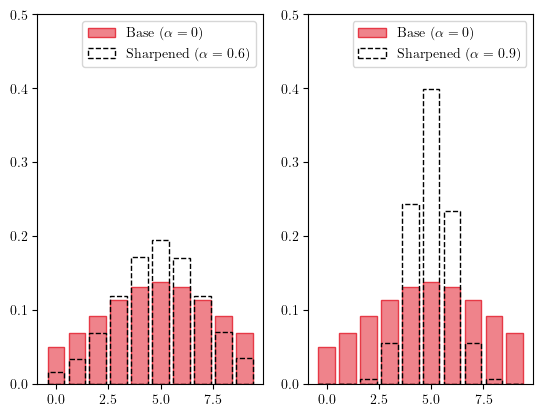

In [7]:
plot_sharpen_example(confidences=[0.6, 0.9])